In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

In [14]:
# Generate synthetic regression data
N = 200
X = torch.randn(N, 4)
true_weights = torch.tensor([[1.5, -2.0], [0.5, 1.0], [-1.0, 0.7], [2.0, -0.5]])
Y = X @ true_weights + torch.randn(N, 2) * 0.1 # Add Noise

In [21]:
class RegressionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 15),
            nn.ReLU(),
            nn.Linear(15, 2)
            )
    def forward(self, x):
        return self.net(x)

In [22]:
# Training Function
def train_model(mode='sgd'):
  model = RegressionNN()
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  criterion = nn.MSELoss()

  if mode == 'sgd':
      loader = DataLoader(TensorDataset(X, Y), batch_size=1, shuffle=True)
  elif mode == 'batch':
    loader = DataLoader(TensorDataset(X, Y), batch_size=N, shuffle=True)
  elif mode == 'mini':
    loader = DataLoader(TensorDataset(X,Y), batch_size=32, shuffle=True)
  else:
    raise ValueError("Invalid Mode")

  loss_list = []
  for epoch in range(100):
    epoch_loss = 0
    for xb, yb in loader:
      preds = model(xb)
      loss = criterion(preds, yb)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      epoch_loss += loss.item() * xb.size(0)
    loss_list.append(epoch_loss / N)
  return loss_list


In [23]:
# Train using three different methods
loss_sgd = train_model('sgd')
loss_batch = train_model('batch')
loss_mini = train_model('mini')

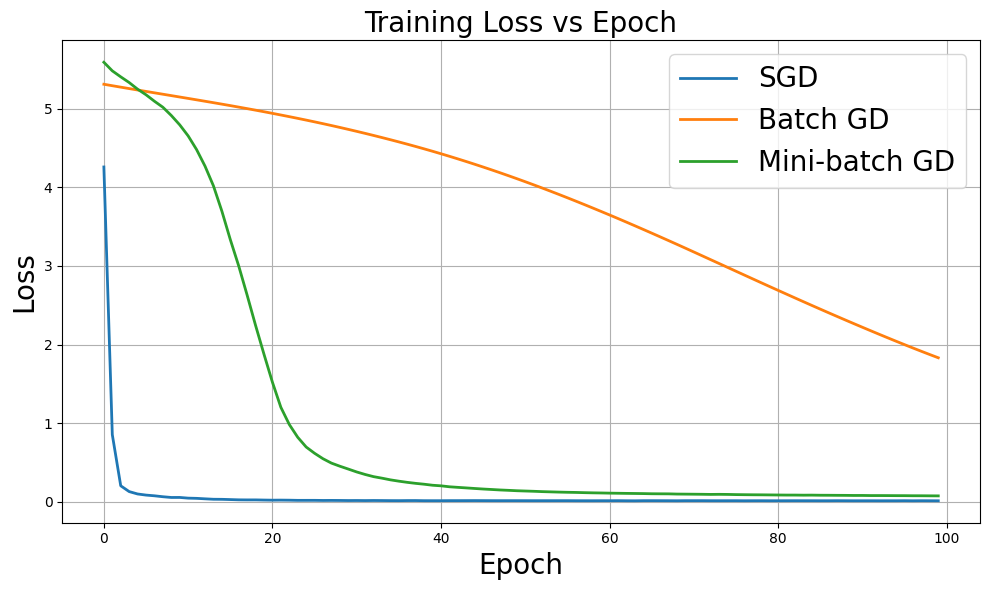

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(loss_sgd, label= 'SGD', linewidth=2)
plt.plot(loss_batch, label='Batch GD', linewidth=2)
plt.plot(loss_mini, label='Mini-batch GD', linewidth=2)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Training Loss vs Epoch', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()